# Project 2: Ames Property Watch
### Part 2 Exploratory Data Analysis

_Author: Evonne Tham_

---

In this notebook I will: Explore more columns, Look at the relationships between columns, Use external data to check my data is sufficent

## 1. Import Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

---
## 2. Read in and display Train Dataset

In [2]:
train = pd.read_csv("../datasets/train_cleaned.csv") 
train.set_index('id', inplace=True)
train.shape

(2048, 79)

In [3]:
train.head()

,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,20,RL,141.0,31770,1,None,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,3,3,CBlock,3.0,4.0,3.0,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,2,1,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,3,7,Typ,2,4.0,Attchd,1960.0,Fin,2.0,528.0,3.0,3.0,1,210,62,0,0,0,0,None,None,None,0,5,2010,WD,215000
3,20,RL,81.0,14267,1,None,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,3,3,CBlock,3.0,3.0,0.0,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,3,1,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,4,6,Typ,0,None,Attchd,1958.0,Unf,1.0,312.0,3.0,3.0,2,393,36,0,0,0,0,None,None,Gar2,12500,6,2010,WD,172000
5,60,RL,74.0,13830,1,None,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,PConc,4.0,3.0,0.0,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,4,1,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,3,6,Typ,1,3.0,Attchd,1997.0,Fin,2.0,482.0,3.0,3.0,2,212,34,0,0,0,0,None,MnPrv,None,0,3,2010,WD,189900
8,120,RL,43.0,5005,1,None,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,4,3,PConc,4.0,3.0,0.0,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,5,1,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,4,5,Typ,0,None,Attchd,1992.0,RFn,2.0,506.0,3.0,3.0,2,0,82,0,0,144,0,None,None,None,0,1,2010,WD,191500
9,120,RL,39.0,5389,1,None,IR1,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1995,1996,Gable,CompShg,CemntBd,CmentBd,None,0.0,4,3,PConc,4.0,3.0,0.0,GLQ,1180.0,Unf,0.0,415.0,1595.0,GasA,5,1,SBrkr,1616,0,0,1616,1.0,0.0,2,0,2,1,4,5,Typ,1,3.0,Attchd,1995.0,RFn,2.0,608.0,3.0,3.0,2,237,152,0,0,0,0,None,None,None,0,3,2010,WD,236500


## 3. Exploratory Data Analysis

### 3.1. The Distribution of SalesPrice

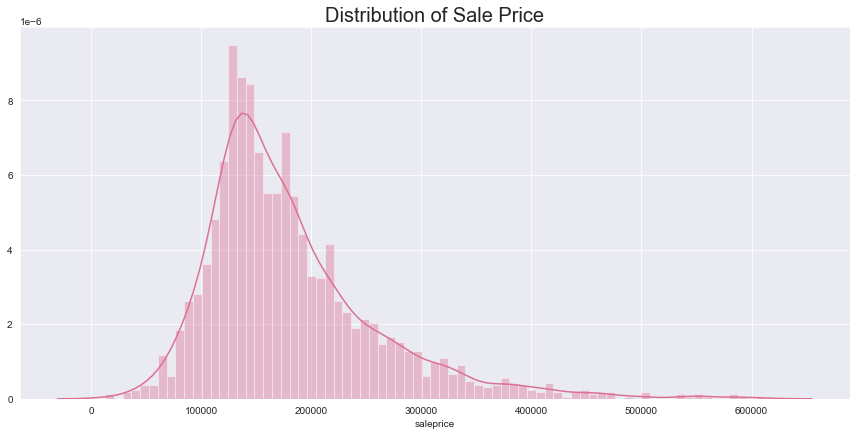

In [4]:
plt.figure(figsize =(12,6))
sns.distplot(train['saleprice'], kde= True, bins=75, color = 'palevioletred')
plt.tight_layout()
plt.title('Distribution of Sale Price', fontsize = 20);

##### Observation: 

As mentioned earlier the average sale price is 181484, with a large standard deviation of 79248. The cheapest home is 12789 while the most expensive is around 611657. The median sales price was 162500, which is slightly below the average sales price. And shown on the graph, it is positively skewed. 

### 3.2. Heatmap of the Correlation

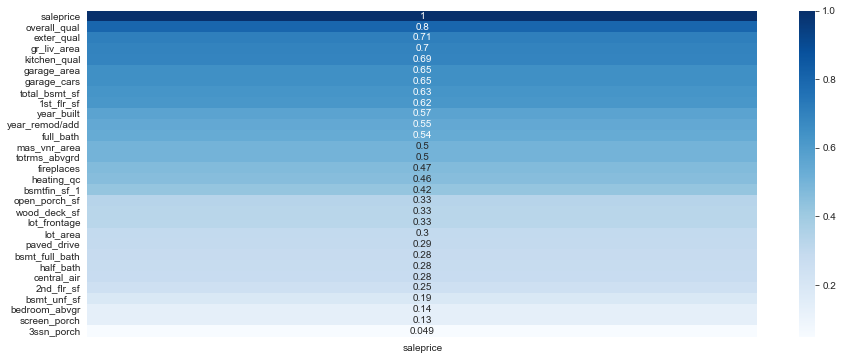

In [5]:
# Variables has highest positive correlation against Sale Price
plt.figure(figsize = (15,6))
train_corr = train.corr()[['saleprice']].sort_values('saleprice', ascending=False)
positive_corr = train_corr.head(30)

sns.heatmap(positive_corr, annot = True, cmap='Blues');

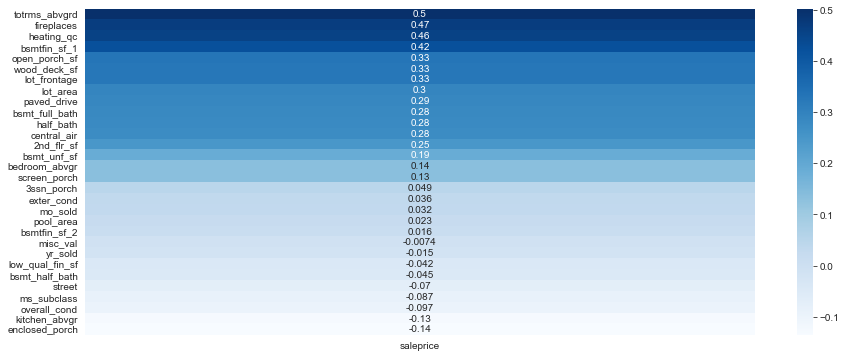

In [6]:
# Variables has highest negative correlation against Sale Price
plt.figure(figsize = (15,6))
neg_corr = train_corr.tail(30)
sns.heatmap(neg_corr, annot = True, cmap='Blues');

### 4. Scatterplots 

In [7]:
train.corr()['saleprice'].sort_values(ascending=False).head(15)

saleprice         1.000000
overall_qual      0.800975
exter_qual        0.712880
gr_liv_area       0.698046
kitchen_qual      0.692190
garage_area       0.650000
garage_cars       0.648103
total_bsmt_sf     0.631507
1st_flr_sf        0.621181
year_built        0.572256
year_remod/add    0.550055
full_bath         0.537369
mas_vnr_area      0.504025
totrms_abvgrd     0.502909
fireplaces        0.470091
Name: saleprice, dtype: float64

In [8]:
train.corr()['saleprice'].sort_values(ascending=False).tail(15)

screen_porch       0.134652
3ssn_porch         0.048755
exter_cond         0.036409
mo_sold            0.031868
pool_area          0.023115
bsmtfin_sf_2       0.016393
misc_val          -0.007398
yr_sold           -0.015330
low_qual_fin_sf   -0.041650
bsmt_half_bath    -0.045378
street            -0.069912
ms_subclass       -0.087383
overall_cond      -0.097118
kitchen_abvgr     -0.125593
enclosed_porch    -0.135516
Name: saleprice, dtype: float64

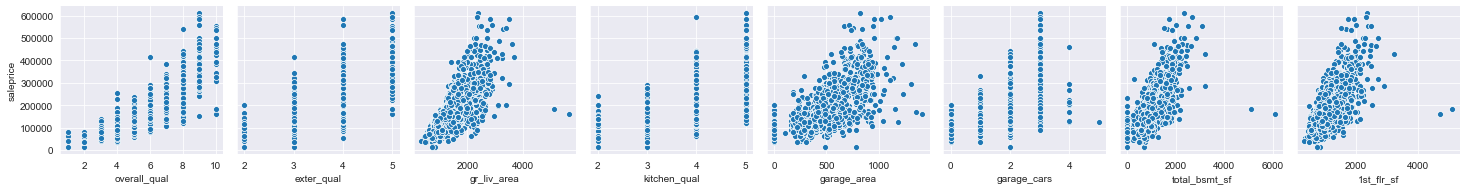

In [9]:
# Picking out the top correlation coefficient values 
# that are >= +0.6 <= -0.6 
sns.pairplot(train,
             y_vars = ['saleprice'],
             x_vars = ['overall_qual', 'exter_qual', 'gr_liv_area', 
                       'kitchen_qual', 'garage_area', 'garage_cars', 
                       'total_bsmt_sf', '1st_flr_sf']);


These variables have a relative strong postitive correlation to sale price. however, I have noticed two particular property that lies outside of the normal. They are of very high square feet but were sold at her very low price. 

### 6. Boxplot

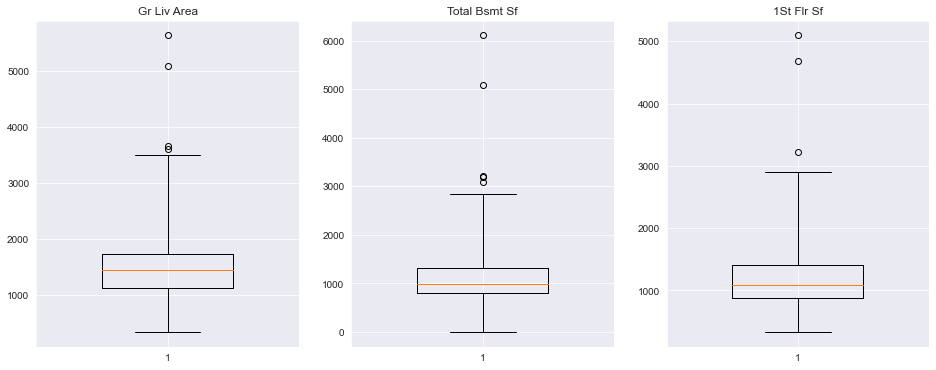

In [10]:
#using boxplot to highlight the outliers
box_list = ['gr_liv_area', 
            'total_bsmt_sf', 
            '1st_flr_sf']

fig, ax = plt.subplots(1,3,figsize=(16, 6))
ax = ax.ravel()

for i, col in enumerate(box_list): 
    ax[i].boxplot(train[col], widths=[0.5], whis=3)
    ax[i].set_title(col.replace('_',' ').title(),fontsize=12)

### 7. Outlier

In [11]:
#Taking a closer look at gr_liv_area, total_bsmt_sf, 1st_flr_sf
#These property are indeed the outliers hence choosing to remove them

print((train['gr_liv_area'])[train['gr_liv_area'] > 3500])
print((train['1st_flr_sf'])[train['1st_flr_sf'] > 3500])
print((train['total_bsmt_sf'])[train['total_bsmt_sf'] > 3500])

id
1499    5642
2181    5095
2667    3608
2738    3672
Name: gr_liv_area, dtype: int64
id
1499    4692
2181    5095
Name: 1st_flr_sf, dtype: int64
id
1499    6110.0
2181    5095.0
Name: total_bsmt_sf, dtype: float64


In [12]:
train.shape

(2048, 79)

In [13]:
train.drop([1499, 2181, 2667, 2738], inplace=True)

In [14]:
train.shape

(2044, 79)

In [15]:
#Saving cleaned Data
train.to_csv('../datasets/train_cleaned.csv')

----> Proceed to the next notebook for [preprocessing and feature engineering](./03_Preprocessing_and_Feature_Engineering.ipynb)